In [1]:
import os.path as op
import numpy as np

import hnn_core
from hnn_core import calcium_model, simulate_dipole, read_params
from joblib import Parallel, delayed
import pandas as pd
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [2]:
data_path = '../data/calcium_simulations/'
df = pd.read_pickle(f'{data_path}/calcium_simulations.pkl')

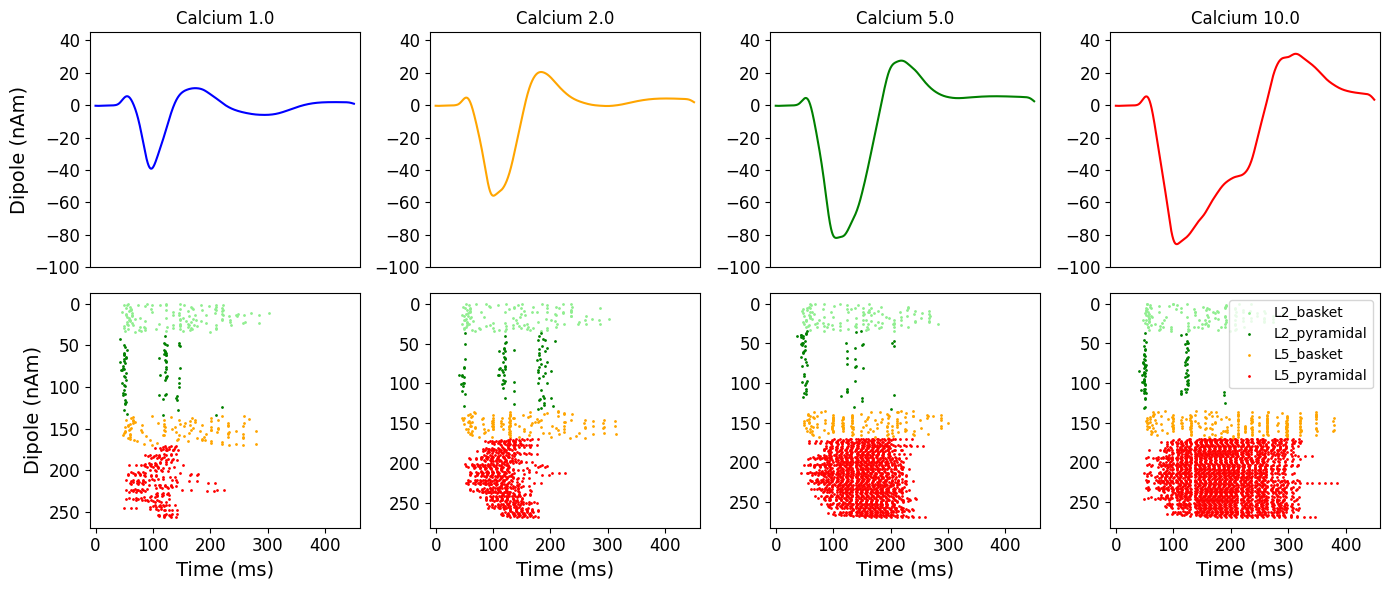

In [50]:
labelsize = 14
ticksize = 12

calcium_scale = df['calcium_scale'].unique()
ylim = -100, 45

plot_cell_types = ['L2_basket', 'L2_pyramidal', 'L5_basket', 'L5_pyramidal']

times = df['times'].values[0]
xlim = (times[0] - 10, times[-1] + 10)

calcium_colors = ['blue', 'orange', 'green', 'red']
spike_colors = {'L2_basket': 'lightgreen', 'L2_pyramidal': 'green', 'L5_basket': 'orange', 'L5_pyramidal': 'red'}

plt.figure(figsize=(14,6))
for idx, scale in enumerate(calcium_scale):
    plot_idx1 = idx + 1
    plot_idx2 = idx + 1 + len(calcium_scale)

    mask = df['calcium_scale'] == scale
    df_filtered = df[mask]
    dpl_data = np.stack(df_filtered['dpl'])
    
    # Top row of plots with dipole
    plt.subplot(2, len(calcium_scale), plot_idx1)
    plt.plot(times, np.mean(dpl_data, axis=0), color=calcium_colors[idx])
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.title(f'Calcium {scale}')

    spike_times = np.array(df_filtered['spike_times'].values[0][0])
    spike_gids = np.array(df_filtered['spike_gids'].values[0][0])
    spike_types = np.array(df_filtered['spike_types'].values[0][0])

    plt.xticks([], fontsize=ticksize)
    plt.yticks(fontsize=ticksize)

    # Bottom row with spike rasters
    plt.subplot(2, len(calcium_scale), plot_idx2)
    for cell_type in plot_cell_types:
        spike_mask = spike_types == cell_type
        plt.scatter(spike_times[spike_mask], spike_gids[spike_mask], s=1, label=cell_type, color=spike_colors[cell_type])

    plt.xlabel('Time (ms)', fontsize=labelsize)
    plt.gca().invert_yaxis()
    plt.xlim(xlim)

    plt.xticks(fontsize=ticksize)
    plt.yticks(fontsize=ticksize)

plt.legend()

plt.subplot(2, len(calcium_scale), 1)
plt.ylabel('Dipole (nAm)', fontsize=labelsize)
plt.subplot(2, len(calcium_scale), 5)
plt.ylabel('Dipole (nAm)', fontsize=labelsize)


plt.tight_layout()



0      [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
1      [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
2      [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
3      [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
4      [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
                             ...                        
195    [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
196    [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
197    [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
198    [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
199    [0.0, 0.025, 0.05, 0.075, 0.09999999999999999,...
Name: times, Length: 200, dtype: object

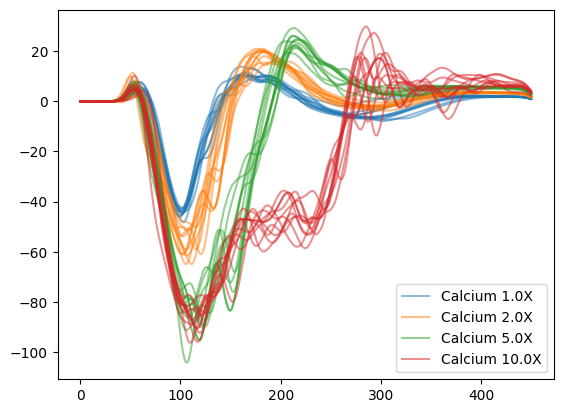

In [87]:
times = df['times'].values[0]
for plot_idx, scale in enumerate(calcium_list):
    mask = df['calcium_scale'] == scale
    dpl_data = np.stack(df[mask]['dpl'].values)
    plt.plot(times, dpl_data[0,:], color=f'C{plot_idx}', alpha=0.5, label=f'Calcium {scale}X')
    plt.plot(times, dpl_data.T, color=f'C{plot_idx}', alpha=0.5)
plt.legend()